In [4]:
# Importación de bibliotecas
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns

# Tarea 7 - Distribuciones de Probabilidad Discretas

> Asignatura: Simulación<br/>
> Estudiante: Eduardo Zhizhpon

## A. Introducción

## B. Descripción

### 1. Hipergeométrica

Se define como: dada una población finita de tamaño N, donde hay dos tipos de objetos denominados como éxitos y fracasos. La distribución hipergeométrica es utilizada para casos donde se extraigan muestras o se realicen experiencias repetidas sin devolución del elemento extraído. Por lo tanto, es útil para el cálculo de probabilidades de juegos de azar y en el estudio de muestras pequeñas.

Consideraciones a tener en cuenta dentro de la distribución hipergeométrica:

- El proceso consta de *n* pruebas, separadas o separables de entre un conjunto de *N* pruebas posibles.
- Cada una de las pruebas puede dar únicamente dos resultados mutuamente excluyentes.
- El número de individuos que presentan la característica A (éxito) es *M*.
- Limitantes de los valores:
    - *r* : $max(0, n - N + M)$ y $min(n, M)$ inclusivo
    - *n* : $1 \leq n \leq N$
    - *N* : $N \geq 1$
    - *M* : $M \geq 1$
- En la primera prueba las probabilidades son: $P(A) = p$ y $P(A) = q$; con $p + q = 1$.

Para ello, se define la variable aleatoria $r = \text{"n° de éxitos obtenidos"}$. Siendo la función de probabilidad:
$$p(r;n,N,M)=\frac{ \left(\begin{array}{c} M \\ r \end{array}\right) . \left(\begin{array}{c} N-M \\ n-r \end{array}\right) }{ \left(\begin{array}{c} N \\ n \end{array}\right) }
$$

Donde:

> **M** = cantidad de éxitos posibles en la población <br/>
**N** = tamaño de población <br/>
**n** = tamaño de la muestra <br/>
**r** = valor que toma la variable aleatoria

## C. Ejemplo del uso

### 1. Hipergeométrica

La distribución hipergeométrica se lo puede realizar en Python de la siguiente manera:

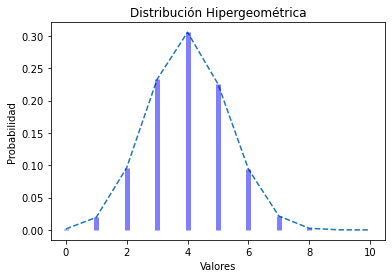

In [8]:
# Graficando Hipergeométrica
M, n, N = 30, 10, 12 # parametros de forma 
hipergeometrica = stats.hypergeom(M, n, N) # Distribución
x = np.arange(0, n+1)
fmp = hipergeometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Hipergeométrica')
plt.ylabel('Probabilidad')
plt.xlabel('Valores')
plt.show()

Histograma:

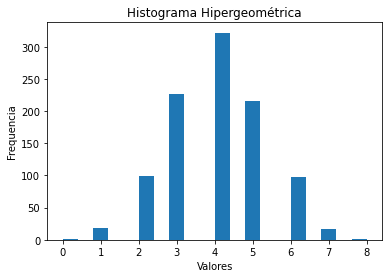

In [7]:
# histograma
aleatorios = hipergeometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('Frequencia')
plt.xlabel('Valores')
plt.title('Histograma Hipergeométrica')
plt.show()

**Ejemplo de aplicación**

Como se mostró anteriormente, esta distribución puede ser usada en para calcular la probabilidad de juegos de azar. Por ejemplo, la extracción de 8 cartas de 40 totales, donde el objetivo es que salgan sólo "A". Al realizar la extracción, sin devolver las cartas seleccionadas, llamamos *r* a las cartas con la letra "A". Por lo tanto, *r* seguirá una distribución hipergeométrica con los siguientes parámetros y su respectiva resolución:

|Parámetros|Resolución|
|:----------:|:-------------:|
| **N** = 40 <br/>**M** = 10 <br/>**n** = 8 <br/>**r** = 4 <br/> | $$p(4;8,40,10)=\frac{ \left(\begin{array}{c} 10 \\ 4 \end{array}\right) . \left(\begin{array}{c} 30 \\ 4 \end{array}\right) }{ \left(\begin{array}{c} 40 \\ 8 \end{array}\right) } = 0,075 $$|